In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [2]:

# Load data
data = pd.read_csv('PhishingDataset.csv')

# Sample balancing
phish = data[data.Result == 1]
legit = data[data.Result == -1]
legit_sample = legit.sample(n=6157, replace=True)
data2 = pd.concat([legit_sample, phish], axis=0)

In [17]:
# Feature and target selection
X = data2.drop('Result', axis=1)
y = data2['Result']



In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [19]:
# Decision Tree with Hyperparameter Tuning
tree_params = {'max_depth': [10, 20, 30]}
tree_grid = GridSearchCV(tree, tree_params, cv=5)
tree_grid.fit(X_train, y_train)
best_tree = tree_grid.best_estimator_

In [20]:
# SVM with Hyperparameter Tuning
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
svm = SVC(probability=True)
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_


In [21]:
# Logistic Regression
lrc = LogisticRegression(max_iter=250)
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=250)

In [22]:
# Ensemble Model
ensemble = VotingClassifier(estimators=[('Logistic', lrc), ('Decision', best_tree), ('SVC', best_svm)], voting='soft')
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression(max_iter=250)),
                             ('Decision', DecisionTreeClassifier(max_depth=30)),
                             ('SVC', SVC(C=10, gamma=0.1, probability=True))],
                 voting='soft')

In [23]:
# Evaluation
acc_train_ensemble = accuracy_score(y_train, ensemble.predict(X_train))
acc_test_ensemble = accuracy_score(y_test, ensemble.predict(X_test))
print("Ensemble Model: Accuracy on training Data: {:.3f}".format(acc_train_ensemble))
print("Ensemble Model: Accuracy on test Data: {:.3f}".format(acc_test_ensemble))

Ensemble Model: Accuracy on training Data: 0.988
Ensemble Model: Accuracy on test Data: 0.979


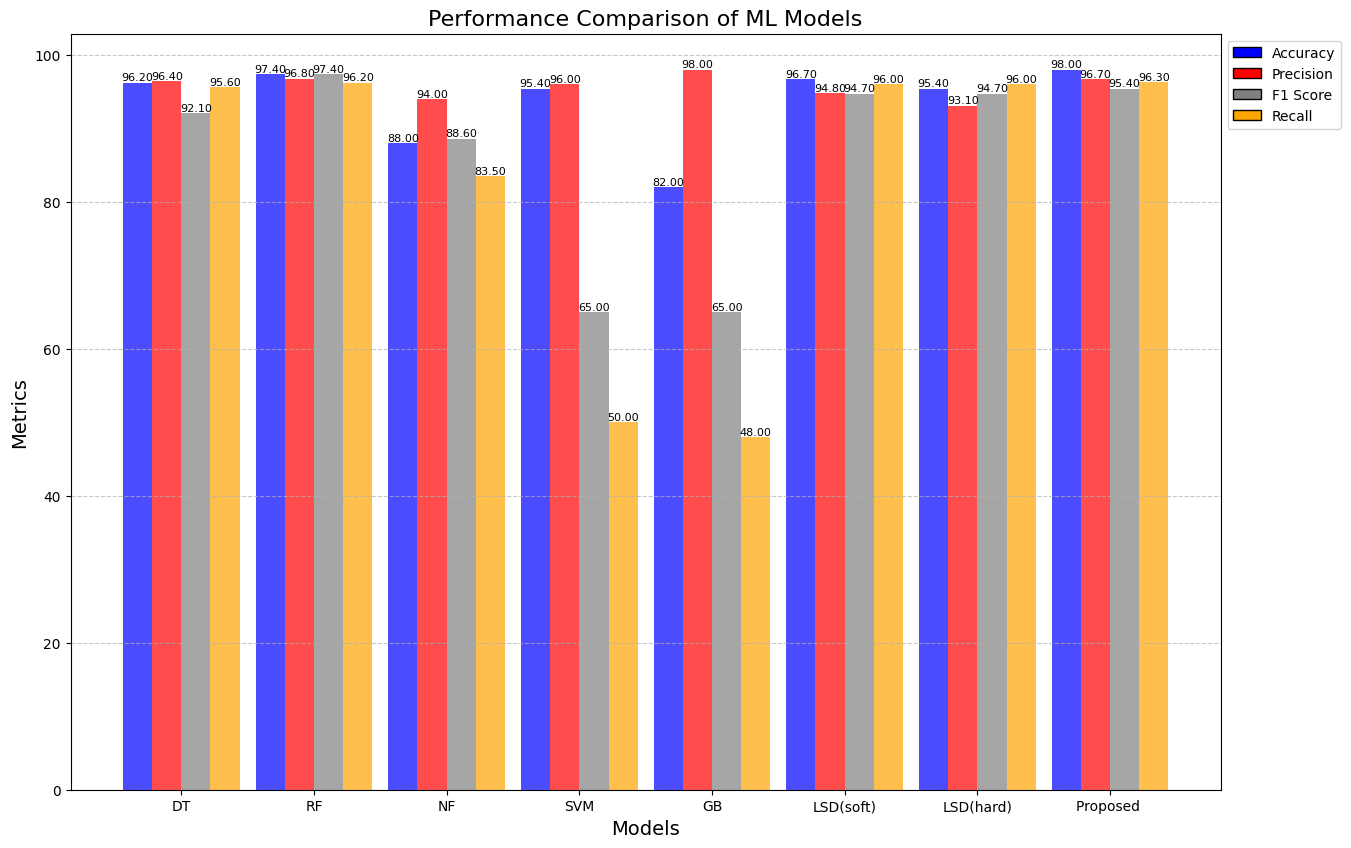

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# List of colors for each metric
colors = ['blue', 'red', 'gray', 'orange']

# Sample data (replace this with your actual data)
models = ['DT', 'RF', 'NF', 'SVM', 'GB', 'LSD(soft)', 'LSD(hard)', 'Proposed ']
accuracy = [96.2, 97.4, 88, 95.4, 82, 96.7, 95.4, 98]
precision = [96.4, 96.8, 94, 96, 98, 94.8, 93.1, 96.7]
f1score = [92.1, 97.4, 88.6, 65, 65, 94.7, 94.7, 95.4]
recall = [95.6, 96.2, 83.5, 50, 48, 96, 96, 96.3]

# Plotting the bar chart
plt.figure(figsize=(20, 12))  # Adjust figure size as needed
bar_width = 0.22  # Adjust this value to control the bar width
space_between_models = 0.22  # Adjust this value to control the space between models

# Plotting bars for accuracy
bars_accuracy = plt.bar([i for i in range(len(models))], accuracy, color=colors[0], alpha=0.7, width=bar_width, label='Accuracy')

# Plotting bars for precision
bars_precision = plt.bar([i + space_between_models for i in range(len(models))], precision, color=colors[1], alpha=0.7, width=bar_width, label='Precision')

# Plotting bars for F1 score
bars_f1score = plt.bar([i + 2 * space_between_models for i in range(len(models))], f1score, color=colors[2], alpha=0.7, width=bar_width, label='F1 Score')

# Plotting bars for recall
bars_recall = plt.bar([i + 3 * space_between_models for i in range(len(models))], recall, color=colors[3], alpha=0.7, width=bar_width, label='Recall')

# Adding annotations with values on top of bars for each metric
for bars in [bars_accuracy, bars_precision, bars_f1score, bars_recall]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, '{:.2f}'.format(bar.get_height()), ha='center', va='bottom', fontsize=8)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.title('Performance Comparison of ML Models', fontsize=16)

# Adjust the x-axis ticks and labels to center each group of bars
plt.xticks([i + 1.5 * space_between_models for i in range(len(models))], models)

# Adding a custom legend outside the graph
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', label=label) for i, label in enumerate(['Accuracy', 'Precision', 'F1 Score', 'Recall'])]
legend = plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout to make room for the legend and add more space at the bottom
plt.subplots_adjust(right=0.7, bottom=0.25)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()